# ボストン住宅価格予測 決定木

## データを取得する

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

## 取得データをDataFrameにする

In [2]:
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
Xy = pd.concat([X, y], axis =1)

## データ探索

データ探索は主に以下の方法で行われます。

- 一変数の可視化 - 生データセットの各フィールドの要約統計情報を提供
- 二変数の可視化 - データセット内の各変数と目的の目標変数との関係を見つけるために実行されます
- 多変数の可視化 - データセット内の異なるフィールド間の相互作用を理解するために実行されます
- 次元削除 - データの次元数を減らし、人間が理解できる次元で可視化を行う、または次元を圧縮することで高速に計算を行う

## 基本的なデータ探索

### このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)

- ボストンマサチューセッツ州の住宅に関する米国国勢調査サービスによって収集された情報
- Harrison, D.とRubinfeld, D.L.が1978年に作成

### それぞれのカラムは何を指しているか

- CRIM→人口 1 人当たりの犯罪発生数
- ZN→25,000 平方フィート以上の住居区画の占める割合
- INDUS→小売業以外の商業が占める面積の割合
- CHAS→チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
- NOX→NOx の濃度
- RM→住居の平均部屋数
- AGE→1940 年より前に建てられた物件の割合
- DIS→5つのボストン市の雇用施設からの距離 (重み付け済)
- RAD→環状高速道路へのアクセスしやすさ
- TAX→$10,000 ドルあたりの不動産税率の総計
- PTRATIO→町毎の児童と教師の比率
- B→町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
- LSTAT→給与の低い職業に従事する人口の割合 (%)

## 一変数の可視化
describeメソッドを使用することで、全体のカウント、平均、標準偏差、最小値、最大値などを把握することができる。

In [3]:
Xy.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## describeメソッドを用いることで把握できたこと

### 前処理に関して気をつけるべき点

### 機械学習の手法選択に活かせること

### 機械学習の特徴選択について考えられること

## 二変数の可視化、相関

二変数の相関を確かめために、pandas.DataFrame.corrメソッドを使用します。

In [4]:
Xy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### そもそも相関とは何か

### MEDVにもっとも相関があると出力された変数を3つほどあげよ

### 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）

## 相関の注意点

### 相関が正しく2変数の関係を表していない時がある、それはどのような場合か

### その場合、どのような手段によって、確認するべきか

## 二変数の可視化　プロット
MEDVと相関係数が高い3つの変数について、それぞれプロット図を作成。

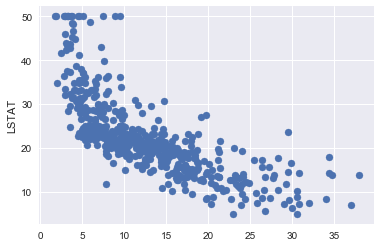

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = X['LSTAT'].values
plt.scatter(x,y)
plt.xlabel('')
plt.ylabel('LSTAT')

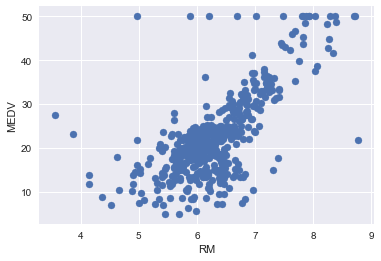

In [6]:
x=X['RM'].values
plt.scatter(x,y)
plt.xlabel('RM')
plt.ylabel('MEDV')

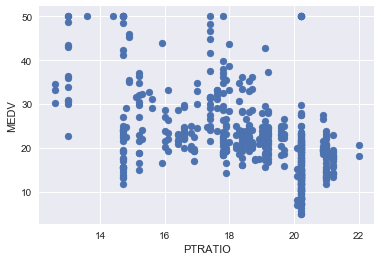

In [7]:
x=X['PTRATIO'].values
plt.scatter(x,y)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

それぞれのプロット結果から、今回の相関は、・・・

## 前処理
今回は前処理の必要はない。

## データセット分割

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth = 1)
tree_2 = DecisionTreeRegressor(max_depth = 2)
tree_3 = DecisionTreeRegressor(max_depth = 3)

tree_1.fit(X_train,  y_train)
tree_2.fit(X_train,  y_train)
tree_3.fit(X_train,  y_train)

score_tree_1 = tree_1.score(X_test, y_test)
score_tree_2 = tree_2.score(X_test, y_test)
score_tree_3 = tree_3.score(X_test, y_test)

print("深さ1のモデルの決定係数は%.2f"%(score_tree_1))
print("深さ2のモデルの決定係数は%.2f"%(score_tree_2))
print("深さ3のモデルの決定係数は%.2f"%(score_tree_3))

深さ1のモデルの決定係数は0.37
深さ2のモデルの決定係数は0.62
深さ3のモデルの決定係数は0.66


In [10]:
print(__doc__)

import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
        
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


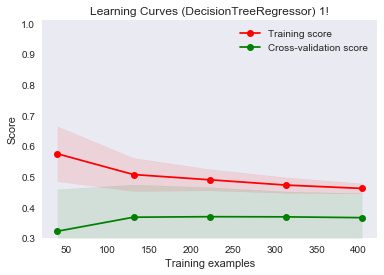

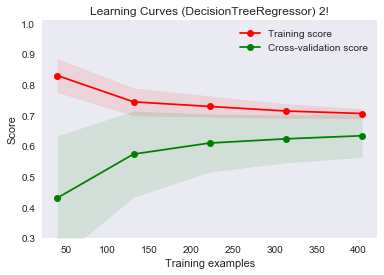

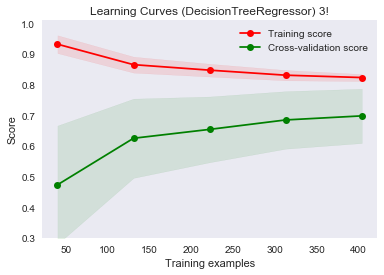

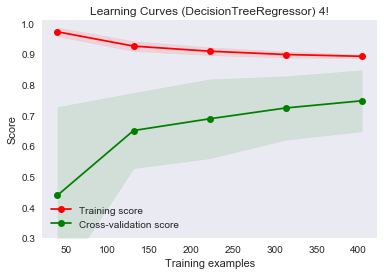

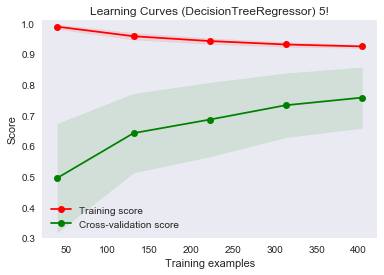

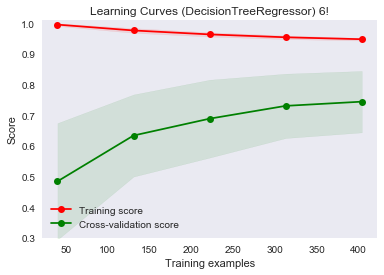

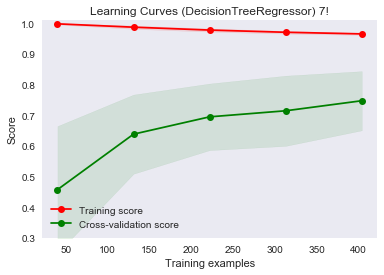

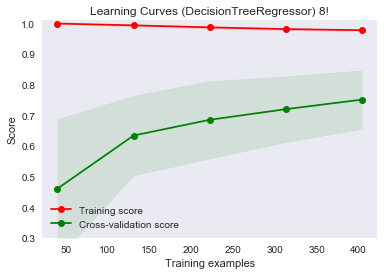

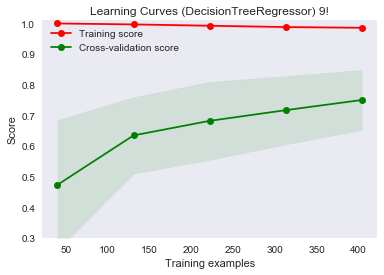

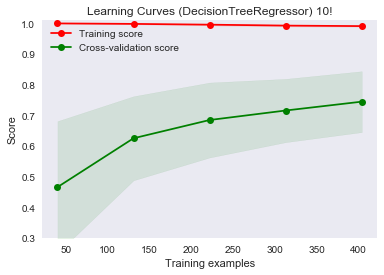

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
i = 1
for degree in range(1,11):
    title = "Learning Curves (DecisionTreeRegressor) %s!"  % i
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X, y, ylim = (0.3, 1.01), cv = cv, n_jobs = 4)
    i += 1

## 学習曲線について

### High varianceとは何か

学習データの精度は高いがテストデータの精度が低い状態

### High Biasとは何か

データサイズを増やしても学習データの精度、テストデータの精度がともに低い状態

### もっとも結果が良いと思われた深さをひとつ選択せよ

5

### なぜその深さが最も良いか記述せよ

訓練データscoreが良いため

### その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

学習データを超えることはないので、データ数を増やしてもscore8.0くらいがMAXと推測できる。

In [58]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.622596538377
{'max_depth': 2}


In [13]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
for cv in range(2,11):
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=cv)
    grid.fit(X_train,y_train)
    print(grid.score(X_test, y_test))
    print(grid.best_params_)

0.697262781431
{'max_depth': 4}
0.676195798068
{'max_depth': 5}
0.660259629727
{'max_depth': 6}
0.622596538377
{'max_depth': 2}
0.708142997179
{'max_depth': 5}
0.687889208811
{'max_depth': 6}
0.678193618976
{'max_depth': 5}
0.710928241398
{'max_depth': 6}
0.664276379469
{'max_depth': 9}


### グリッドサーチについて

### グリッドサーチとは何か

パラメータを全通りで学習させるライブラリ

### グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ

ランダムサーチ、ベイズ最適化

### その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか

無作為にパラメータを抽出して探索し、グリッドサーチよりも計算時間が短くて済むというメリットがある

## グリッドサーチを使いこなす
### Kfold3回の場合

In [15]:
grid_3 = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid_3.fit(X_train,y_train)
print(grid_3.best_params_)

{'max_depth': 5}


### Kfold10回の場合

In [75]:
grid_10 = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid_10.fit(X_train,y_train)
print(grid_10.best_params_)

{'max_depth': 6}


### どの折りたたみ回数がベストなのか

### 評価方法を平均二乗誤差に変更する

In [17]:
scoring_fnc = 'mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anacon

-31.4246885545
{'max_depth': 2}


C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kakiuchi\Anacon

## テスト

In [83]:
from sklearn import cross_validation

Xy = Xy.reindex(np.random.permutation(Xy.index))

X = Xy.drop(['MEDV'], axis=1)
y = Xy['MEDV']

tree_best = DecisionTreeRegressor(max_depth = 6)
tree_best.fit(X, y)

scores = cross_validation.cross_val_score(tree_best, X, y, cv=10)

print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [ 0.58815342  0.89141293  0.77981507  0.88134513  0.80031553  0.79909712
  0.77812862  0.91046515  0.8992542   0.85340668]
Accuracy: 0.82 (+/- 0.18)
